In [117]:
# Load libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(ISLR)
library(GGally)
library(dplyr)
library(ISLR)
library(caret)
options(repr.matrix.max.rows = 6, repr.plot.width = 8, repr.plot.height = 5)

In [118]:
# Load the Dataset
url <- "https://raw.githubusercontent.com/Zitong06/data/refs/heads/main/players.csv"
players_original <- read_csv(url)

# Remove NA. from the dataset
players_na.rm <- na.omit(players_original)

#Factorize experience and gender
players_fac <- players_na.rm |>
        mutate(
            experience = factor(experience, ordered=TRUE),
            gender = factor(gender),
            subscribe = factor(subscribe)
        )
players_fac
summary(players_fac)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<ord>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


    experience subscribe   hashedEmail         played_hours    
 Amateur :63   FALSE: 52   Length:194         Min.   :  0.000  
 Beginner:35   TRUE :142   Class :character   1st Qu.:  0.000  
 Pro     :13               Mode  :character   Median :  0.100  
 Regular :35                                  Mean   :  5.905  
 Veteran :48                                  3rd Qu.:  0.600  
                                              Max.   :223.100  
     name                         gender         Age       
 Length:194         Agender          :  2   Min.   : 8.00  
 Class :character   Female           : 37   1st Qu.:17.00  
 Mode  :character   Male             :124   Median :19.00  
                    Non-binary       : 15   Mean   :20.52  
                    Prefer not to say: 11   3rd Qu.:22.00  
                    Two-Spirited     :  5   Max.   :50.00  

In [119]:
# Tibble for further prediction
players <- players_fac|>
    select(played_hours, experience, subscribe, Age) |>
    as_tibble()
players

played_hours,experience,subscribe,Age
<dbl>,<ord>,<fct>,<dbl>
30.3,Pro,TRUE,9
3.8,Veteran,TRUE,17
0.0,Veteran,FALSE,17
⋮,⋮,⋮,⋮
0.3,Veteran,FALSE,22
0.0,Amateur,FALSE,17
2.3,Amateur,FALSE,17


In [120]:
# Split the data
set.seed(2020)
players_split <- initial_split(players, prop = 0.7, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)

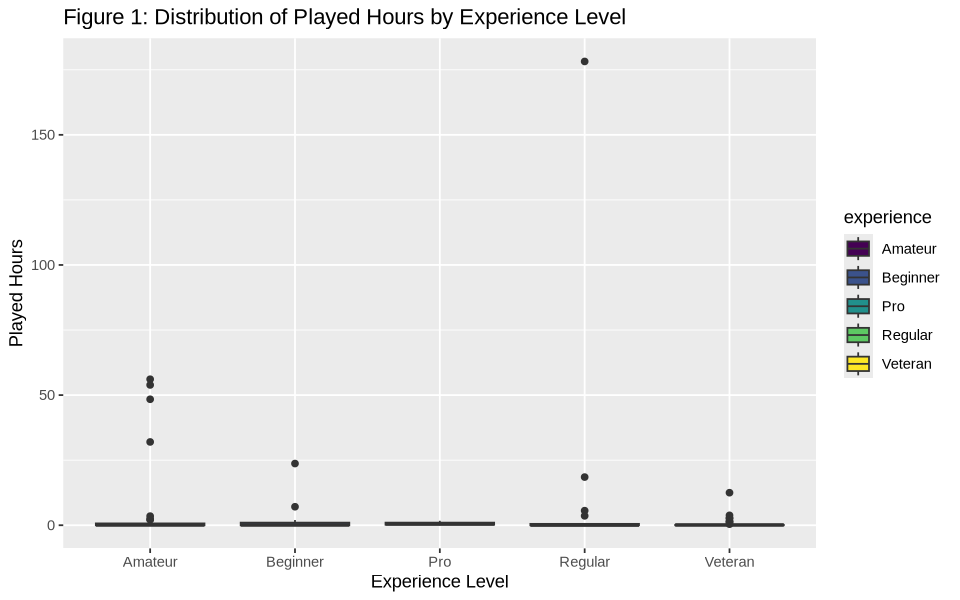

In [121]:
# Figure 1
# Distribution of Played Hours by Experience Level
experience_plot <- players_train|>
ggplot(aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot() +
  labs(x = "Experience Level", y = "Played Hours") +
  ggtitle("Figure 1: Distribution of Played Hours by Experience Level")
experience_plot

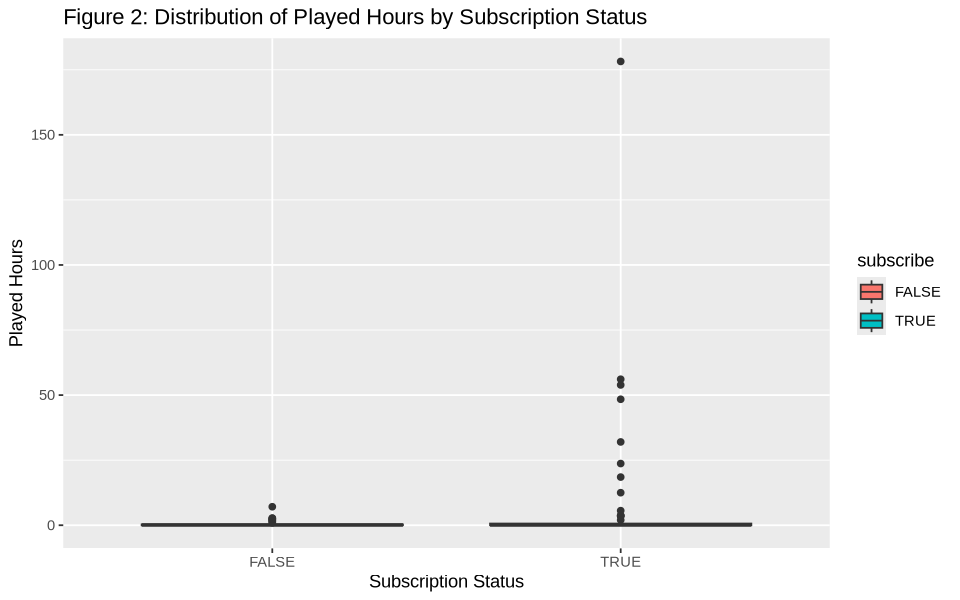

In [122]:
# Figure 2 
# Distribution of Played Hours by Subscription Status
subscription_status_plot <- players_train|>
ggplot(aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot() +
  labs(x = "Subscription Status", y = "Played Hours") +
  ggtitle("Figure 2: Distribution of Played Hours by Subscription Status")
subscription_status_plot

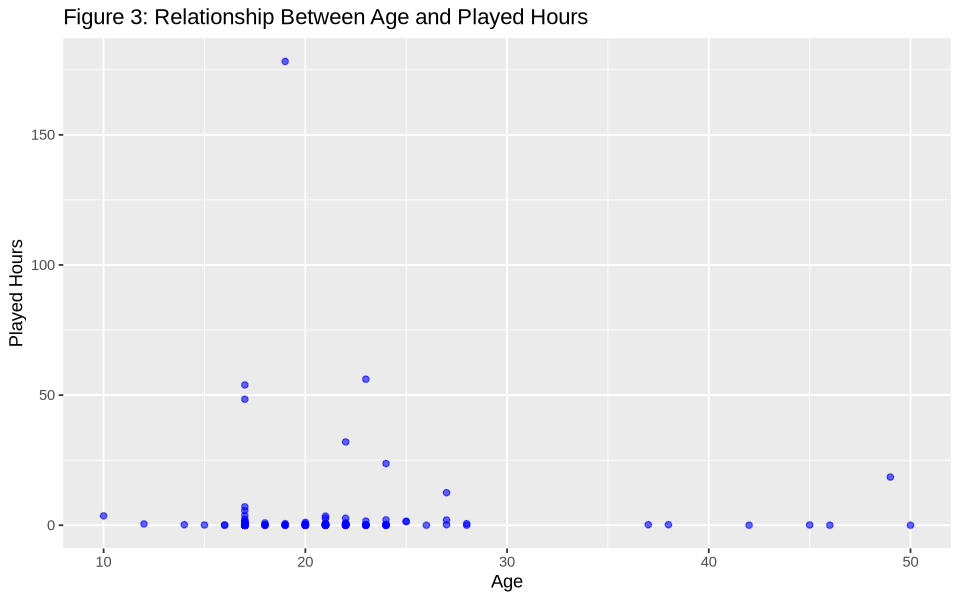

In [123]:
# Figure 3
# Relationship Between Age and Played Hours
Age_plot <- players_train |>
ggplot(aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.6, color = "blue") +
  labs(x = "Age", y = "Played Hours") +
  ggtitle("Figure 3: Relationship Between Age and Played Hours")
Age_plot

In [124]:
set.seed(2020)

# Model specification
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

# Recipe
players_recipe <- recipe(played_hours ~ experience + subscribe + Age, data=players_train)

lm_spec
players_recipe

Linear Regression Model Specification (regression)

Computational engine: lm 




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



In [125]:
set.seed(2020) 
# Fit a Model with Workflow
players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(lm_spec) |>
    fit(data=players_training)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
  (Intercept)   experience.L   experience.Q   experience.C   experience^4  
      1.03541        0.08702       -0.48093       -6.59736       -4.22516  
subscribeTRUE            Age  
      3.17415        0.01329  


In [126]:
# The results of test
lm_test_results <- players_fit |>
  predict(players_test) |>
  bind_cols(players_test) |>
  metrics(truth = played_hours, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,43.09635040
rsq,standard,0.08544296
mae,standard,14.09804230


In [127]:
# Calculate RMSE for evaluating the model performance

lm_rmse <- players_fit |>
        predict(new_data=players_train) |>
         bind_cols(players_train) |>
         metrics(truth = played_hours, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmse

[1] 17.03885

In [128]:
# 5-fold Cross-validation 
ctrl <- trainControl(method = "repeatedcv", number = 5, repeats = 3)
cv_model <- train(played_hours ~ ., data = players_train, method = "lm", trControl = ctrl)
cat("Cross Validation RMSE:", cv_model$results$RMSE, "\n")

Cross Validation RMSE: 14.78372 


.pred,played_hours,experience,subscribe,Age
<dbl>,<dbl>,<ord>,<fct>,<dbl>
1.556185,30.3,Pro,TRUE,9
1.642126,3.8,Veteran,TRUE,17
-1.532022,0.0,Veteran,FALSE,17
⋮,⋮,⋮,⋮,⋮
-1.465589,0.3,Veteran,FALSE,22
2.530445,0.0,Amateur,FALSE,17
2.530445,2.3,Amateur,FALSE,17


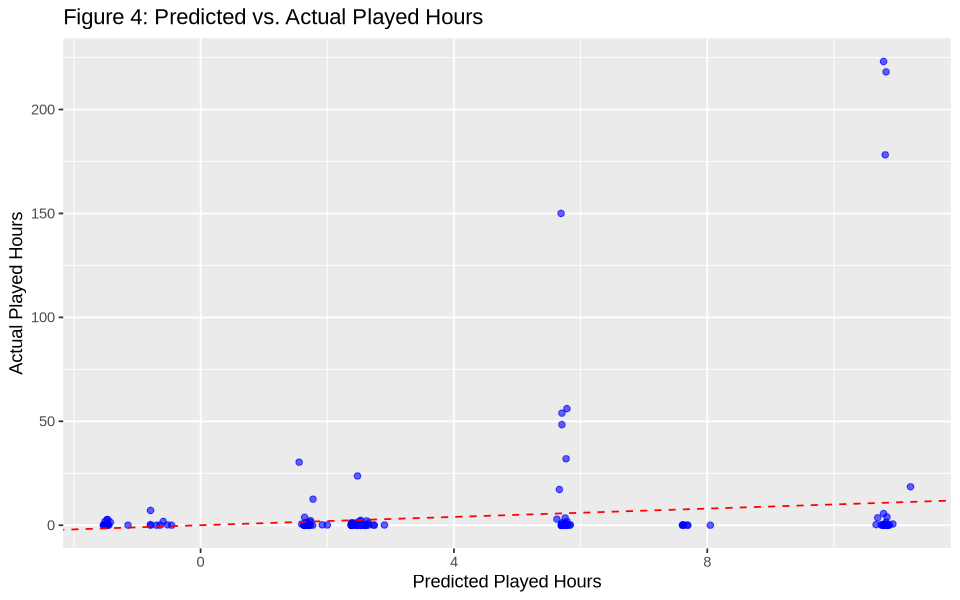

In [129]:
# Diagnostic Visualization
# Figure 4
# Predicted vs Actual

predicted_values <- players_fit |>
  predict(players) |>
  bind_cols(players) 
predicted_values

predicted_vs_actual_plot <- ggplot(predicted_values, aes(x = .pred, y = played_hours)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(x = "Predicted Played Hours", y = "Actual Played Hours") +
  ggtitle("Figure 4: Predicted vs. Actual Played Hours") 
predicted_vs_actual_plot